   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

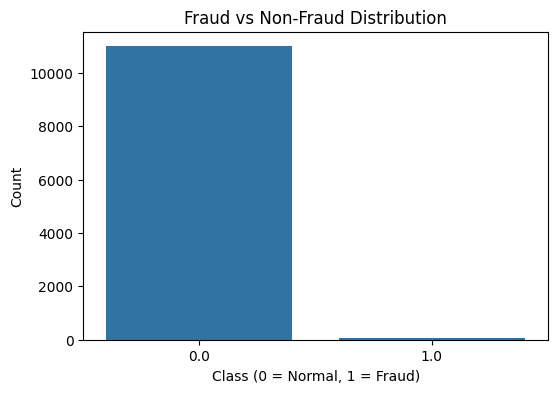

Train Fraud Ratio: 0.004300588501584427
Test Fraud Ratio: 0.004526935264825713


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2199
         1.0       0.56      0.90      0.69        10

    accuracy                           1.00      2209
   macro avg       0.78      0.95      0.85      2209
weighted avg       1.00      1.00      1.00      2209

Random Forest Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2199
         1.0       1.00      0.80      0.89        10

    accuracy                           1.00      2209
   macro avg       1.00      0.90      0.94      2209
weighted avg       1.00      1.00      1.00      2209



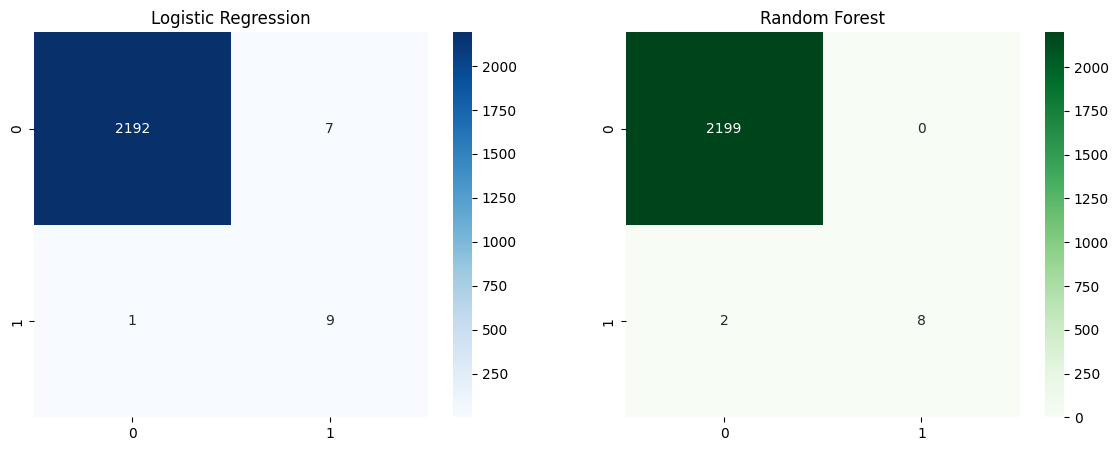

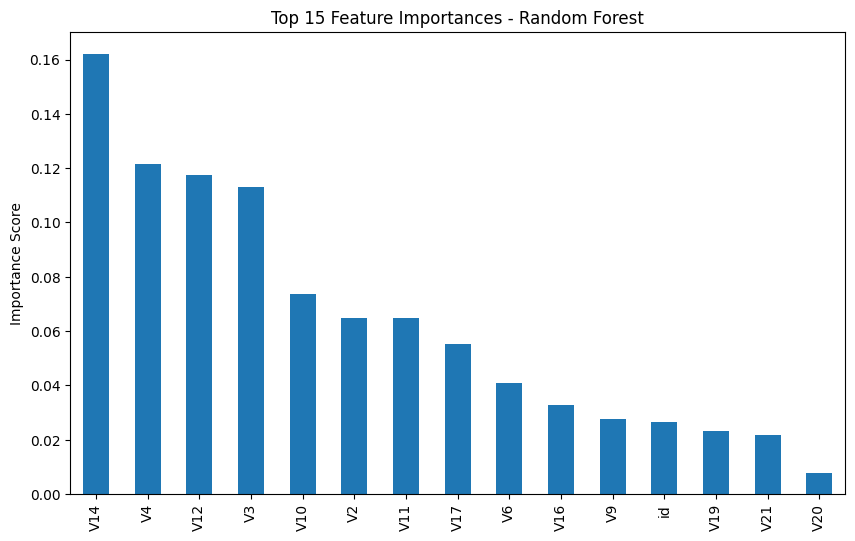

✅ Model and scaler saved successfully!


In [7]:
# 1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import joblib

# 2. Load Dataset

df = pd.read_csv("creditcard.csv")

print(df.head())
print(df.info())

# 3. Check Class Imbalance

fraud_counts = df['Class'].value_counts()
print(fraud_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# 4. Feature & Target Separation

# Drop rows with NaN values in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

X = df.drop(columns=['Class'])
y = df['Class']


scaler = StandardScaler()
X[['Amount']] = scaler.fit_transform(X[['Amount']])

# 5. Train-Test Split (Stratified)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train Fraud Ratio:", y_train.mean())
print("Test Fraud Ratio:", y_test.mean())

# 6. Baseline Model: Logistic Regression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_lr))

# 7. Random Forest Model

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))

# 8. Confusion Matrix Comparison

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")

plt.show()

# 9. Feature Importance (Random Forest)

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances - Random Forest")
plt.ylabel("Importance Score")
plt.show()

# 10. Save Best Model

joblib.dump(rf, "random_forest_fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")

🔹 Task: Credit Card Fraud Detection using Random Forest
🎯 Objective

To detect fraudulent credit card transactions using machine learning

To handle highly imbalanced data

To compare a baseline model with an ensemble model (Random Forest)

🛠️ Tools Used

Python

Pandas

Scikit-learn

Matplotlib / Seaborn

Joblib

⚙️ Techniques Applied

Exploratory data analysis to understand fraud vs non-fraud imbalance

Stratified train-test split to preserve class distribution

Feature scaling using StandardScaler

Baseline modeling using Logistic Regression

Ensemble learning using Random Forest (n_estimators = 100)

Handling class imbalance using class_weight = balanced

Model evaluation using Precision, Recall, and F1-Score

Feature importance analysis to identify key fraud indicators

Model persistence using .pkl files

📊 Evaluation Metrics

Precision

Recall

F1-Score
(Accuracy avoided due to class imbalance)

📦 Deliverables

Jupyter Notebook

Feature importance plot

Trained Random Forest model (.pkl)

Scaler object (.pkl)

✅ Final Outcome

Successfully detected fraudulent transactions using an ensemble model

Random Forest outperformed Logistic Regression

Demonstrated understanding of imbalanced data handling, ensemble learning, and model deployment basics